<a href="https://colab.research.google.com/github/Aviawesome/ConsoleApplication2/blob/master/abcd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

## Loading the Data

In [2]:
df1=pd.read_csv('/content/sample_data/flowsalak2.csv')
print(df1.shape)
df1.head()

(387, 2)


,Unnamed: 0,issue_comments
0,0,"|@dimi1357 out of curiosity, what does trainin..."
1,1,"|My god, the paper hasn't even been up for a d..."
2,2,|In their readme they say that the implementat...
3,3,"|@stas00 , this might be up your alley!|Excell..."
4,4,|Commenting for visibility - is this available...


## Data Cleaning

In [3]:
df1=df1[['issue_comments']]
df1.head()

,issue_comments
0,"|@dimi1357 out of curiosity, what does trainin..."
1,"|My god, the paper hasn't even been up for a d..."
2,|In their readme they say that the implementat...
3,"|@stas00 , this might be up your alley!|Excell..."
4,|Commenting for visibility - is this available...


In [4]:
df1.isnull().sum()

issue_comments    73
dtype: int64

In [5]:
data=df1.dropna()
data.head()

,issue_comments
0,"|@dimi1357 out of curiosity, what does trainin..."
1,"|My god, the paper hasn't even been up for a d..."
2,|In their readme they say that the implementat...
3,"|@stas00 , this might be up your alley!|Excell..."
4,|Commenting for visibility - is this available...


In [6]:
data.isnull().sum()
data.shape

(314, 1)

## Text Preprocessing

the Preprocessing phase we do the following in the order below:-

1. Removing the json format 
2. Removing the html tags
3. Remove any punctuations or limited set of special characters like , or . or # etc.
4. Check if the word is made up of english letters and is not alpha-numeric
5. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
6. Convert the word to lowercase
7. Remove Stopwords
8. Finally Snowball Stemming the word (better than Porter Stemming)<br>

In [7]:
def filter_comment(s):
    index=s.find('body')
    index+=8
    return s[index:-4]
        

In [8]:
data['issue_comments']=data['issue_comments'].apply(filter_comment)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,issue_comments
0,"357 out of curiosity, what does training this ..."
1,", the paper hasn't even been up for a day...\r..."
2,ir readme they say that the implementation to ...
3,enough people to warrant this test's usefulne...
4,ting for visibility - is this available now ? ...


In [9]:
def filter_issue_body(s):
    j=0
    for i in s:
        if(i=='#'):
            j+=1
        else:
            break
    return s[j:]

NameError: ignored

In [11]:
from tqdm import tqdm # tqdm is for printing the status bar
import re
from bs4 import BeautifulSoup

In [12]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])
stopwords=list(stopwords)

In [13]:

def remove_shortcuts(phrase):
    phrase=re.sub(r"won't", "will not", phrase)
    phrase=re.sub(r"can\'t", "can not", phrase)
    phrase=re.sub(r"n\'t", " not", phrase)
    phrase=re.sub(r"\'re", " are", phrase)
    phrase=re.sub(r"\'s", " is", phrase)
    phrase=re.sub(r"\'d", " would", phrase)
    phrase=re.sub(r"\'ll", " will", phrase)
    phrase=re.sub(r"\'t", " not", phrase)
    phrase=re.sub(r"\'ve", " have", phrase)
    phrase=re.sub(r"\'m", " am", phrase)
    phrase=re.sub(r"{", "", phrase)
    phrase=re.sub(r"}", "", phrase)
    phrase=re.sub(r":", "", phrase)
    phrase=re.sub(r",", "", phrase)
    phrase=re.sub(r"\'", "", phrase)
    phrase=re.sub(r"@", "", phrase)
    
    return phrase

In [16]:
preprocessed_discussions=[]
#print(len(data_opened['issue_comments']))

for sentence in tqdm(data['issue_comments'].values):
    sentence=re.sub(r"http\S+", " ", sentence)  #removing links
    sentence=BeautifulSoup(sentence, 'lxml').get_text() #removing all HTML related tags
    sentence=remove_shortcuts(sentence)  # removing shortcuts
    sentence=re.sub("\S*\d\S*", " ", sentence).strip()  #
    sentence=re.sub('[^A-Za-z]+', ' ', sentence) #removing alphanumeric words
    
    sentence=' '.join(e.lower() for e in sentence.split() if e.lower() not in stopwords)
    preprocessed_discussions.append(sentence.strip())


100%|██████████| 314/314 [00:00<00:00, 365.52it/s]


### Preprocessed Reviews

In [17]:
print(len(preprocessed_discussions))
print(preprocessed_discussions[:2])
#print(data_opened['issue_comments'].values[:2])

314
['curiosity training look like curiosity training look like training loop python x encoder attention mask decoder attention mask batch x x self device self device encoder attention mask encoder attention mask self device decoder attention mask decoder attention mask self device model kwargs attention mask encoder attention mask decoder attention mask decoder attention mask lm labels self optimizer zero grad outputs self model input ids x decoder input ids model kwargs loss loss backward self optimizer step self scheduler not none self scheduler step create model way pyhon config decoder autoconfig pretrained decoder model name decoder true config encoder autoconfig pretrained encoder model name decoder false config encoderdecoderconfig encoder decoder configs config encoder config decoder res model encoderdecodermodel config config finally make work provide full changes way also interested using model decoder thanks feature request detail code think bit implement get back thanks fe

In [18]:
print(preprocessed_discussions[:10])

['curiosity training look like curiosity training look like training loop python x encoder attention mask decoder attention mask batch x x self device self device encoder attention mask encoder attention mask self device decoder attention mask decoder attention mask self device model kwargs attention mask encoder attention mask decoder attention mask decoder attention mask lm labels self optimizer zero grad outputs self model input ids x decoder input ids model kwargs loss loss backward self optimizer step self scheduler not none self scheduler step create model way pyhon config decoder autoconfig pretrained decoder model name decoder true config encoder autoconfig pretrained encoder model name decoder false config encoderdecoderconfig encoder decoder configs config encoder config decoder res model encoderdecodermodel config config finally make work provide full changes way also interested using model decoder thanks feature request detail code think bit implement get back thanks featur

## Bag of Words

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

#BoW
cv=CountVectorizer(min_df=10)
cv.fit(preprocessed_discussions)
print("some feature names ", cv.get_feature_names()[:10])
print('-'*100)

final_counts=cv.transform(preprocessed_discussions)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])
print('-'*100)


print(cv.get_feature_names()[:50])

some feature names  ['able', 'access', 'according', 'across', 'activity', 'actually', 'add', 'added', 'adding', 'addition']
----------------------------------------------------------------------------------------------------
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (314, 818)
the number of unique words  818
----------------------------------------------------------------------------------------------------
['able', 'access', 'according', 'across', 'activity', 'actually', 'add', 'added', 'adding', 'addition', 'additional', 'addressed', 'adjust', 'agree', 'allow', 'allows', 'almost', 'along', 'already', 'also', 'although', 'always', 'amount', 'another', 'answer', 'anyone', 'anything', 'anyway', 'api', 'append', 'apply', 'appreciate', 'approach', 'architecture', 'architectures', 'args', 'argument', 'arguments', 'around', 'ask', 'assume', 'attention', 'attribute', 'authors', 'auto', 'automatically', 'autotokenizer', 'availabl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Applying Bi-Grams, Tri-Grams and N_Grams on Bag of Words

In [20]:
cv=CountVectorizer(ngram_range=(2,2),min_df=5)
final_bigram_counts=cv.fit_transform(preprocessed_discussions)

print("the type of count vectorizer ",type(final_bigram_counts))
print("the shape of out text BoW vectorizer ",final_bigram_counts.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BoW vectorizer  (314, 571)
the number of unique words including both unigrams and bigrams  571


In [21]:
cv=CountVectorizer(ngram_range=(3,3),min_df=5)
final_bigram_counts=cv.fit_transform(preprocessed_discussions)

print("the type of count vectorizer ",type(final_bigram_counts))
print("the shape of out text BoW vectorizer ",final_bigram_counts.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BoW vectorizer  (314, 106)
the number of unique words including both unigrams and bigrams  106


In [22]:
cv=CountVectorizer(ngram_range=(5,5),min_df=4)
final_bigram_counts=cv.fit_transform(preprocessed_discussions)

print("the type of count vectorizer ",type(final_bigram_counts))
print("the shape of out text BoW vectorizer ",final_bigram_counts.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BoW vectorizer  (314, 80)
the number of unique words including both unigrams and bigrams  80


In [23]:
print(final_bigram_counts[:])

  (0, 20)	1
  (0, 3)	1
  (0, 30)	1
  (0, 61)	1
  (0, 40)	1
  (0, 52)	1
  (0, 0)	1
  (0, 5)	1
  (0, 38)	1
  (0, 46)	2
  (1, 20)	1
  (1, 3)	1
  (1, 30)	1
  (1, 61)	1
  (1, 40)	1
  (1, 52)	1
  (1, 0)	1
  (1, 5)	1
  (1, 38)	1
  (1, 51)	1
  (1, 33)	1
  (1, 55)	1
  (1, 10)	1
  (2, 20)	1
  (2, 3)	1
  :	:
  (269, 73)	10
  (269, 54)	4
  (269, 27)	4
  (269, 57)	1
  (269, 18)	2
  (269, 16)	2
  (269, 71)	2
  (269, 15)	2
  (274, 79)	1
  (279, 67)	1
  (279, 44)	1
  (279, 21)	1
  (279, 78)	1
  (279, 24)	1
  (279, 17)	1
  (279, 22)	1
  (279, 4)	1
  (279, 11)	1
  (279, 56)	1
  (279, 7)	1
  (292, 79)	2
  (293, 46)	1
  (293, 8)	1
  (298, 73)	1
  (298, 27)	1


In [24]:
! pip install spacy

In [25]:
#! python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [26]:
import spacy
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output


In [28]:
tokenized_reviews = lemmatization(preprocessed_discussions)
print(tokenized_reviews[1])

['paper', 'day', 'run', 'parameter', 'favor', 'diddle', 'run', 'model', 'scenario', 'full', 'model', 'least', 'parameter', 'partition', 'egress', 'cost', 'model', 'size', 'available', 'course', 'paper', 'different', 'sized', 'model', 'small', 'practical', 'image', 'colab', 'test', 'least', 'test', 'least', 'code', 'model', 'issue', 'official', 'model', 'use', 'finetuning', 'limited', 'casting', 'course', 'paper', 'different', 'sized', 'model', 'small', 'practical', 'face', 'main', 'benefit', 'small', 'model', 'counterpart', 'context', 'length', 'token', 'use', 'model', 'time', 'archived', 'time', 'shame', 'system', 'last', 'time', 'last', 'time', 'scary', 'soggy', 'diaper', 'excuse', 'foot', 'finish', 'system', 'congruent', 'time', 'frame', 'little', 'update', 'api', 'apply', 'access', 'big', 'company', 'researcher', 'sad', 'way', 'sad', 'open', 'guess', 'enough', 'compute', 'run', 'model', 'smile', 'possible', 'low', 'model', 'regular', 'gpus', 'model', 'model', 'wonder', 'model', 'el

In [29]:
print(len(tokenized_reviews))
print(tokenized_reviews)

314
[['curiosity', 'training', 'curiosity', 'training', 'training', 'encoder', 'attention', 'mask', 'decoder', 'attention', 'mask', 'batch', 'x', 'x', 'self', 'device', 'self', 'device', 'encoder', 'attention', 'mask', 'encoder', 'attention', 'mask', 'self', 'device', 'decoder', 'attention', 'mask', 'decoder', 'attention', 'mask', 'self', 'device', 'model', 'kwargs', 'attention', 'mask', 'encoder', 'attention', 'mask', 'decoder', 'attention', 'mask', 'decoder', 'attention', 'self', 'optimizer', 'grad', 'output', 'self', 'model', 'input', 'x', 'decoder', 'model', 'kwargs', 'loss', 'loss', 'backward', 'self', 'optimizer', 'step', 'self', 'scheduler', 'none', 'self', 'scheduler', 'step', 'way', 'decoder', 'model', 'name', 'decoder', 'true', 'config', 'encoder', 'encoder', 'model', 'name', 'decoder', 'encoder', 'encoder', 'work', 'full', 'change', 'way', 'interested', 'model', 'decoder', 'thank', 'request', 'detail', 'code', 'bit', 'thank', 'feature', 'request', 'detail', 'code', 'bit', 'a

In [31]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [32]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)


In [40]:


p=lda_model.print_topics()
print(p)
print(type(p[0][1]))

[(0, '0.039*"train" + 0.033*"step" + 0.028*"device" + 0.027*"batch" + 0.026*"size" + 0.020*"output" + 0.020*"gradient" + 0.020*"max" + 0.017*"benchmark" + 0.017*"target"'), (1, '0.042*"input" + 0.031*"token" + 0.028*"model" + 0.024*"length" + 0.022*"mask" + 0.020*"batch" + 0.019*"dataset" + 0.018*"label" + 0.016*"true" + 0.016*"decoder"'), (2, '0.032*"attention" + 0.024*"model" + 0.021*"performer" + 0.019*"implementation" + 0.016*"sequence" + 0.012*"test" + 0.012*"time" + 0.011*"embedding" + 0.010*"weight" + 0.009*"work"'), (3, '0.081*"model" + 0.012*"transformer" + 0.011*"input" + 0.011*"size" + 0.010*"decoder" + 0.008*"layer" + 0.008*"class" + 0.008*"weight" + 0.008*"name" + 0.008*"encoder"'), (4, '0.020*"implementation" + 0.015*"model" + 0.012*"interested" + 0.012*"work" + 0.012*"rag" + 0.011*"weight" + 0.009*"available" + 0.009*"help" + 0.007*"search" + 0.007*"small"'), (5, '0.092*"input" + 0.038*"output" + 0.031*"attention" + 0.025*"model" + 0.022*"shape" + 0.019*"name" + 0.018*"t

In [47]:
freq=[]
for item in p:
    s=item[1]
    m=s.split('+')
    for j in m:
      q=j.split('*')
      f=float(q[0])
      if(f>=0.04):
        freq.append(q[1])

In [49]:
print(set(freq))

{'"issue" ', '"model" ', '"file" ', '"input" '}


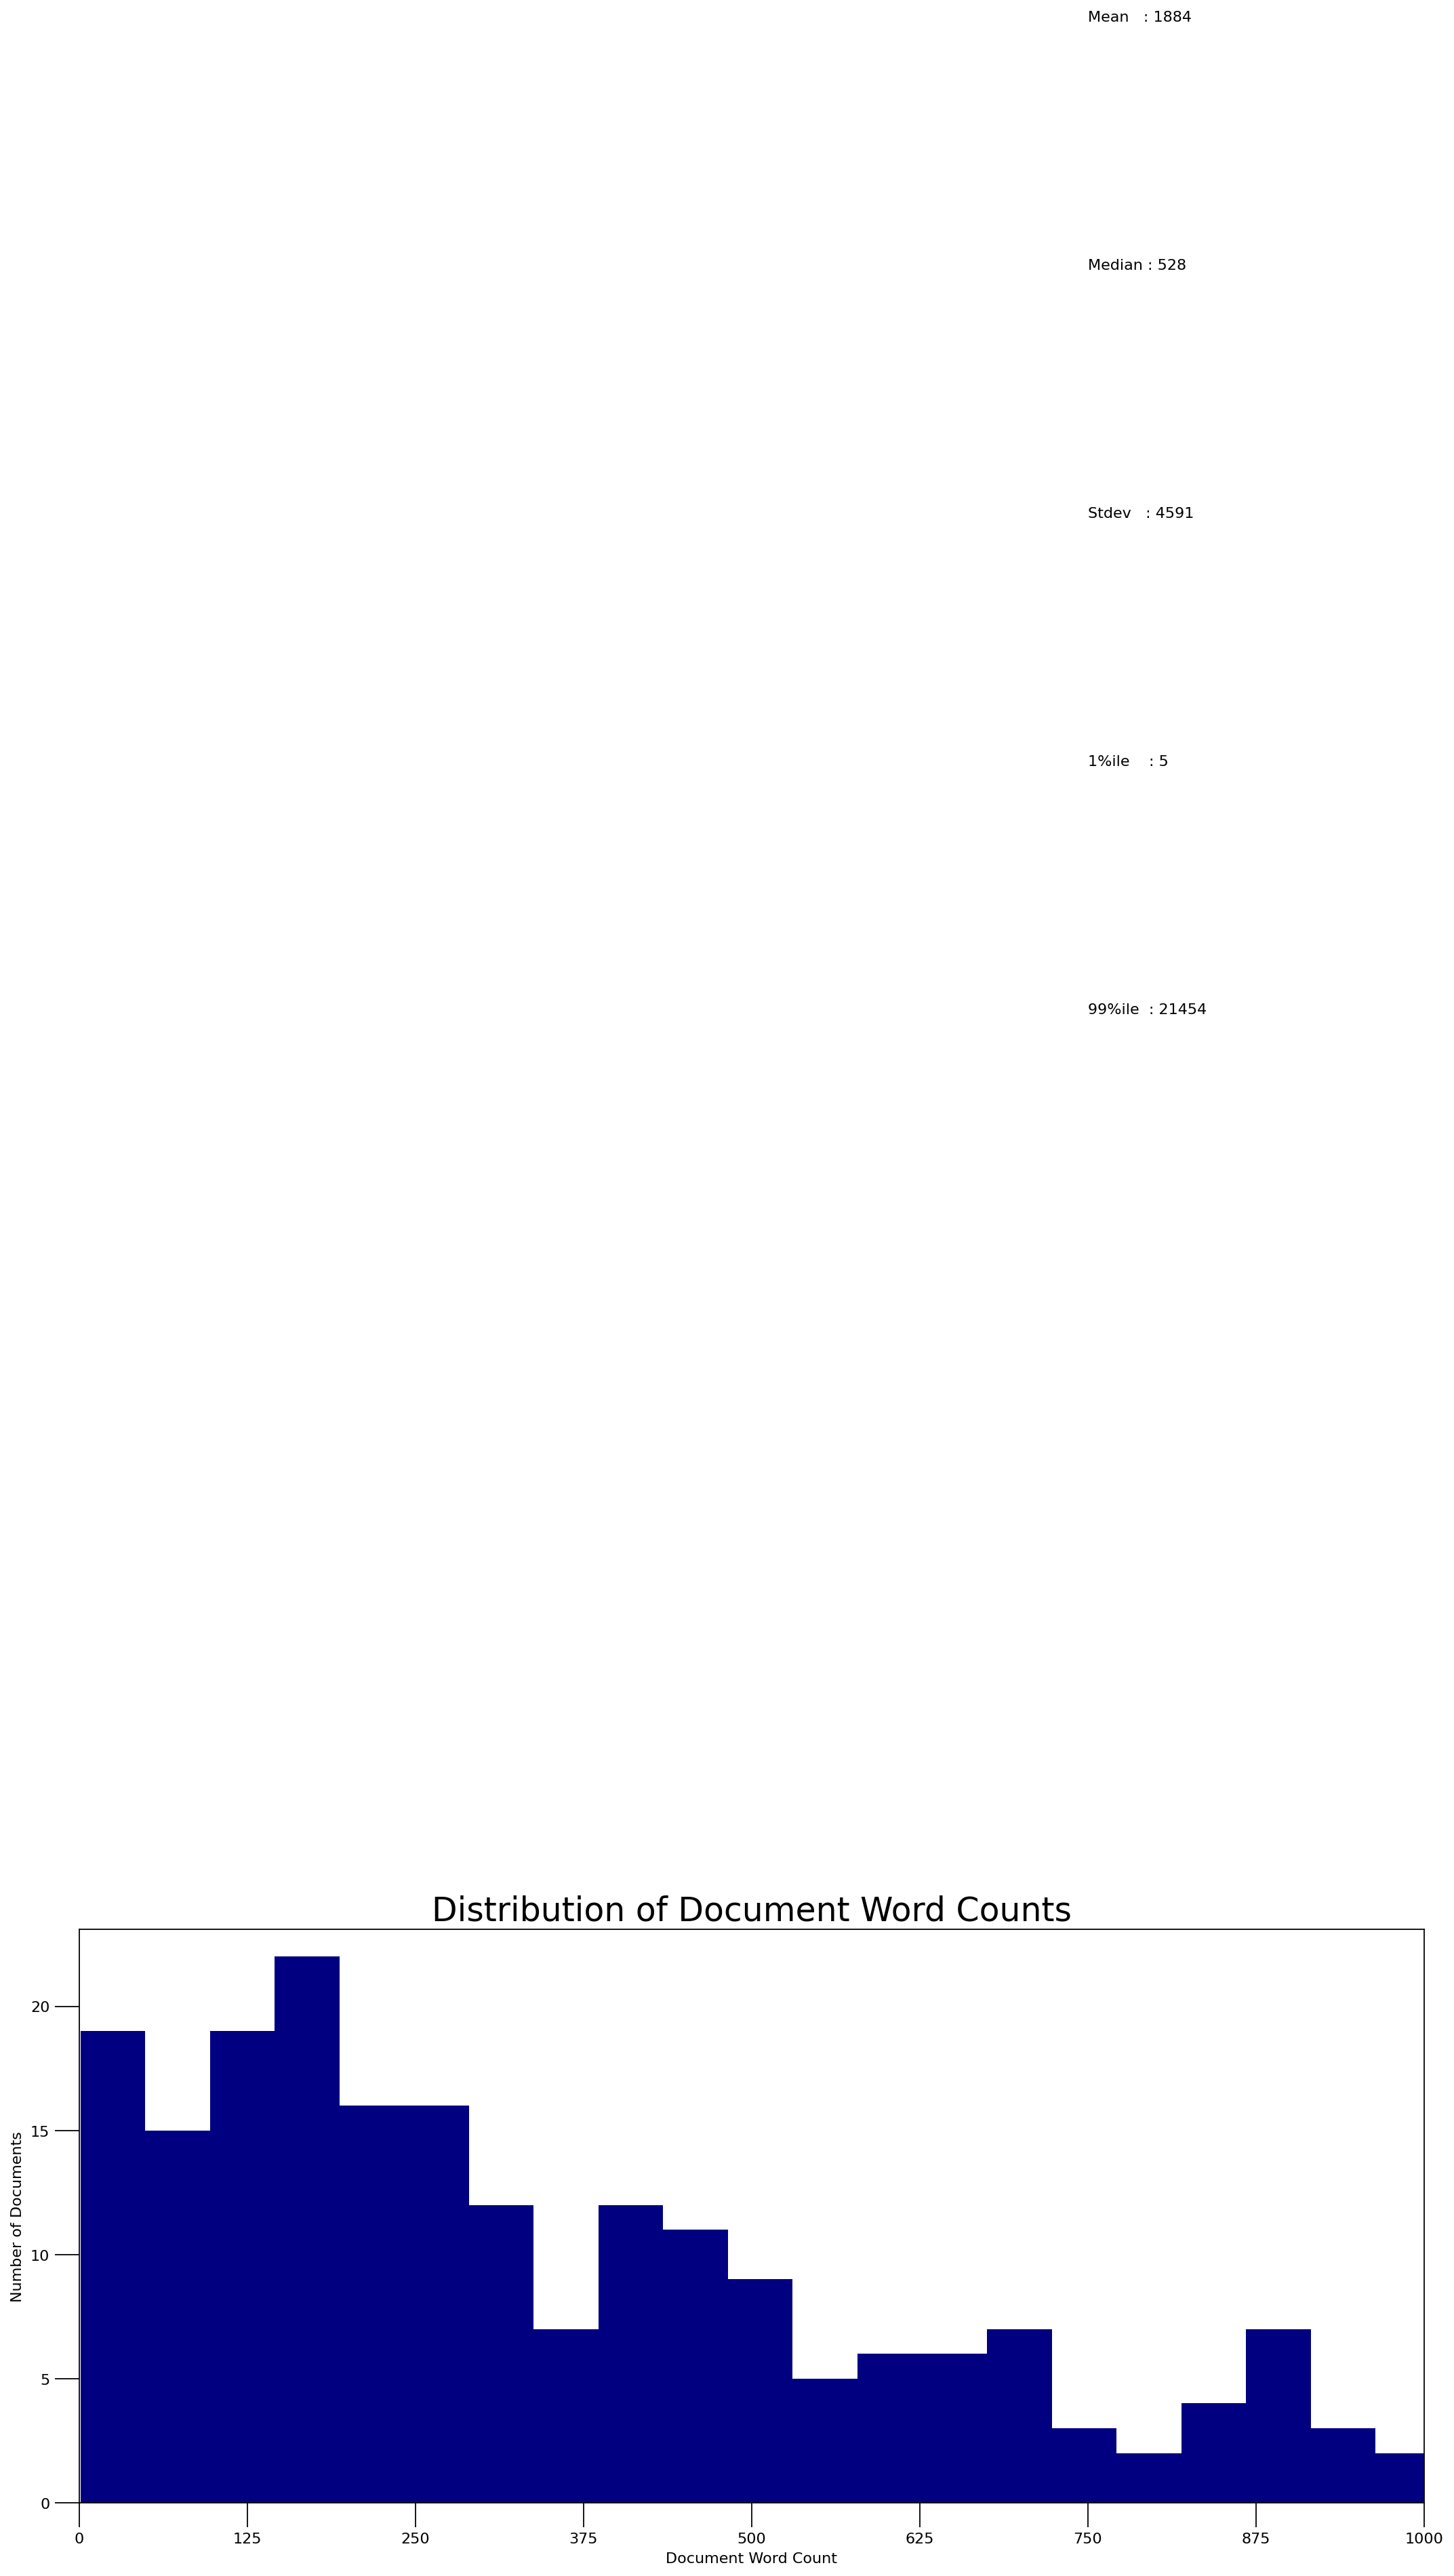

In [36]:
from matplotlib import pyplot as plt
doc_lens = [len(d) for d in preprocessed_discussions]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()